# ASHWIN SURESH (21MIS1174)

# First we will load the file to the variable filepath and supress any kind of warnings that pop up...

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
# Loading File
filepath ='C:/Users/Administrator/OneDrive/Desktop/SEM-6/SWE4012/Lab Files/Iris_Data.csv'

# Using pandas library it enables us to read the csv file and store as a dataframe...

In [2]:
data=pd.read_csv(filepath)

# Displaying first 5 records of the dataframe...

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# To check whether there are any null or empty values in the dataset, since none we proceed further without disturbing the dataset...

In [4]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# To verify the datatypes of the dataset, as only numerical values shall be used...

In [5]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

# We first plot all the data in a 3D graph, because we can't plot graphs of higher dimension. Here we can understand how we will plot the hyperplane for classification technique in further steps (we discarded petal_width due to smaller value at present)...

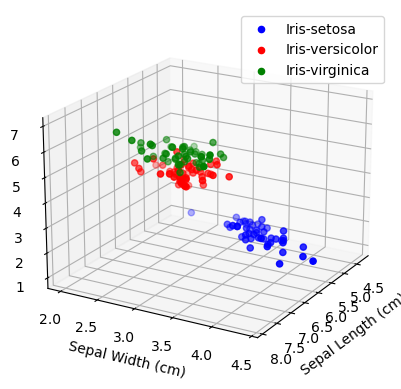

In [6]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a color dictionary for your target classes
colors = {'Iris-setosa':'blue', 'Iris-versicolor':'red', 'Iris-virginica':'green'}

ax = plt.axes(projection='3d')

# Create a scatter plot for each target class
for species, color in colors.items():
    df_species = data[data['species'] == species]
    ax.scatter(df_species['sepal_length'], df_species['sepal_width'], df_species['petal_length'], c=color, label=species)
    
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')

# Rotate the plot
ax.view_init(elev=20, azim=30)
plt.legend()
plt.show()

# We will select the features required and since we have just 4, initially for computation we consider all the 4 features. and alongside we have the target column which is also to be included in a separate array...

In [7]:
X = data[['sepal_length','sepal_width','petal_length','petal_width']]

from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(data.species)

# Here we start splitting the dataset into training and testing using sklearn library and we split in that ratio of 80:20 where 80 represents training set and 20 testing/validating set...

In [8]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size = 0.2)  

# For training the model we import the LinearSVC library from sklearn.svc and pass on the X_train and y_train for calculations...

In [9]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(x_train, y_train)

SVC(kernel='linear')

# Plotting the support vectors found based on each class of target column and number of closest points are represented using the colour "BLACK"...

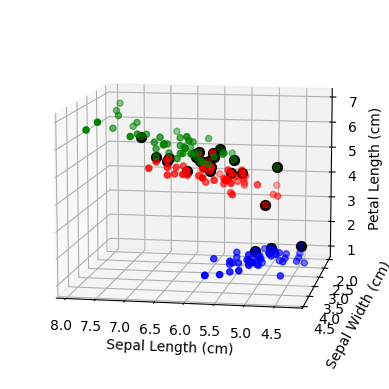

In [10]:
# Get support vectors
support_vectors = svc.support_vectors_

# Create a color dictionary for your target classes
colors = {'Iris-setosa':'blue', 'Iris-versicolor':'red', 'Iris-virginica':'green'}

ax = plt.axes(projection='3d')


# Plot support vectors
for v in support_vectors:
    ax.scatter(v[0], v[1], v[2], c='black', s=50)
    
# Create a scatter plot for each target class
for species, color in colors.items():
    df_species = data[data['species'] == species]
    ax.scatter(df_species['sepal_length'], df_species['sepal_width'], df_species['petal_length'], c=color, label=species)
    
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')

# Rotate the plot
ax.view_init(elev=10, azim=100)
plt.show()


# What is the closest number of points?...

In [11]:
# Print the number of support vectors for each class
print(svc.n_support_)

[ 3 11 12]


# Plotting the hyperplane that is used in SVM for classification between target values, represented on a 3D plane because 3 features are considered for graphical representation... 

In [2]:
plt.figure()

ax = plt.axes(projection='3d')
ax.scatter(x_train['sepal_length'], x_train['sepal_width'], x_train['petal_length'], c='b')

ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')

zz = lambda xx,yy: (-svc.intercept_[0]-svc.coef_[0][0]*xx-svc.coef_[0][1]*yy) / svc.coef_[0][2]
tmpx = np.linspace(4, 7, 20)
tmpy = np.linspace(2, 5, 20)
xx,yy = np.meshgrid(tmpx,tmpy)
ax.plot_surface(xx, yy, zz(xx,yy), cmap='Reds')

# Rotate the plot
ax.view_init(elev=20, azim=100)

NameError: name 'plt' is not defined

# Equation of hyperplane will not be in the general form of y = wx + b, but rather in the form of ax + by + cz + d = 0; 
### d is the bias term added, a, b, c are terms of hyperplane

# -0.0002x + 0.5948y -0.9663z + 0.9039 = 0...

In [13]:
print(svc.coef_[0][0])
print(svc.coef_[0][1])
print(svc.coef_[0][2])
print(svc.intercept_[0])

-0.04638348764923128
0.5208823611951108
-1.0029781077582094
1.4541175068115482


# To classify the result we use confusion matrix and classification report, which contains accuracy, precision, recall, etc...

In [14]:
predictions = svc.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test,predictions)

# For better visualization we plot it as a heatmap...

<Axes: >

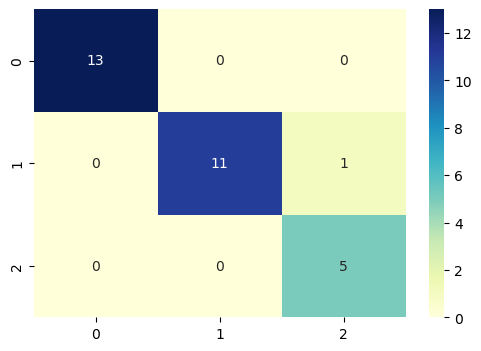

In [15]:
# visualize confusion matrix with seaborn heatmap
import seaborn as sns
plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm)

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [16]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.92      0.96        12
           2       0.83      1.00      0.91         5

    accuracy                           0.97        30
   macro avg       0.94      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [17]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score, precision_score, recall_score
)

y_pred = svc.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")
precision = precision_score(y_pred, y_test, average="weighted")
recall = recall_score(y_pred, y_test, average="weighted")

print(f"Accuracy: {format(accuracy*100, '.3f')} %")
print(f"F1 Score: {format(f1*100, '.3f')} %")
print(f"Precision Score: {format(precision*100, '.3f')} %")
print(f"Recall Score: {format(recall*100, '.3f')} %")

Accuracy: 96.667 %
F1 Score: 96.588 %
Precision Score: 96.944 %
Recall Score: 96.667 %


# To just check the prediction algorithm we see what the Species value is based on dataset value and predicted value...

In [18]:
y_new = svc.predict(np.array([[6.7,3.0,5.2,2.3]]))

if y_new == 0:
    print("Iris-setosa")
elif y_new == 1:
    print("Iris-versicolor")
else:
    print("Iris-virginica")

Iris-virginica


In [19]:
# Assuming 'data' is your DataFrame, 'features' are your columns, and 'target' is your target column
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'

# Your feature array
feature_array = np.array([[6.7,3.0,5.2,2.3]])

# Find the index where all features match the feature_array
index = (data[features] == feature_array).all(axis=1)

# Get the corresponding target value
corresponding_target = data.loc[index, target]

print(corresponding_target)


145    Iris-virginica
Name: species, dtype: object


# Final Interpretation 

The Iris petal dataset which contains 150 rows and 5 columns is used for Support Vector Machine (SVM) model. The dataset is not used as a whole and only specific features are interlinked to the target values. Since no empty or null values are present in the dataset, we split the dataset into 80:20, training and testing modules. Based on which we get accuracy deemed to be 96.667% and similarly for precision and recall score. The point to note in SVM is it is highly suitable for small dataset and once we have built the model it is very easy to predict for sometime what new entries classification and then we could retrain the model to suit those preferences. The hyperplane which looks like a line in 2D plot is actually a plane which distinguishes a set of target values.